In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("C:/Users/hp/Research/loan_data.csv")

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [38]:
df = df.drop(['Loan_ID'], axis=1)

In [39]:
df.shape

(381, 12)

In [40]:
df.info

<bound method DataFrame.info of      Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male     Yes          1      Graduate            No             4583   
1      Male     Yes          0      Graduate           Yes             3000   
2      Male     Yes          0  Not Graduate            No             2583   
3      Male      No          0      Graduate            No             6000   
4      Male     Yes          0  Not Graduate            No             2333   
..      ...     ...        ...           ...           ...              ...   
376    Male     Yes         3+      Graduate            No             5703   
377    Male     Yes          0      Graduate            No             3232   
378  Female      No          0      Graduate            No             2900   
379    Male     Yes         3+      Graduate            No             4106   
380  Female      No          0      Graduate           Yes             4583   

     CoapplicantInc

In [41]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])  #These lines fill missing values in specific columns with the mode value of each column using the 
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)

In [43]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']
for i in c_variables:
    uniques_value = df[i].unique()
    df[i].replace(uniques_value, [0, 1], inplace=True)

In [45]:
for i in ['Property_Area']:
    uniques_value = df[i].unique()
    df[i].replace(uniques_value, [0, 1, 3], inplace=True)

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


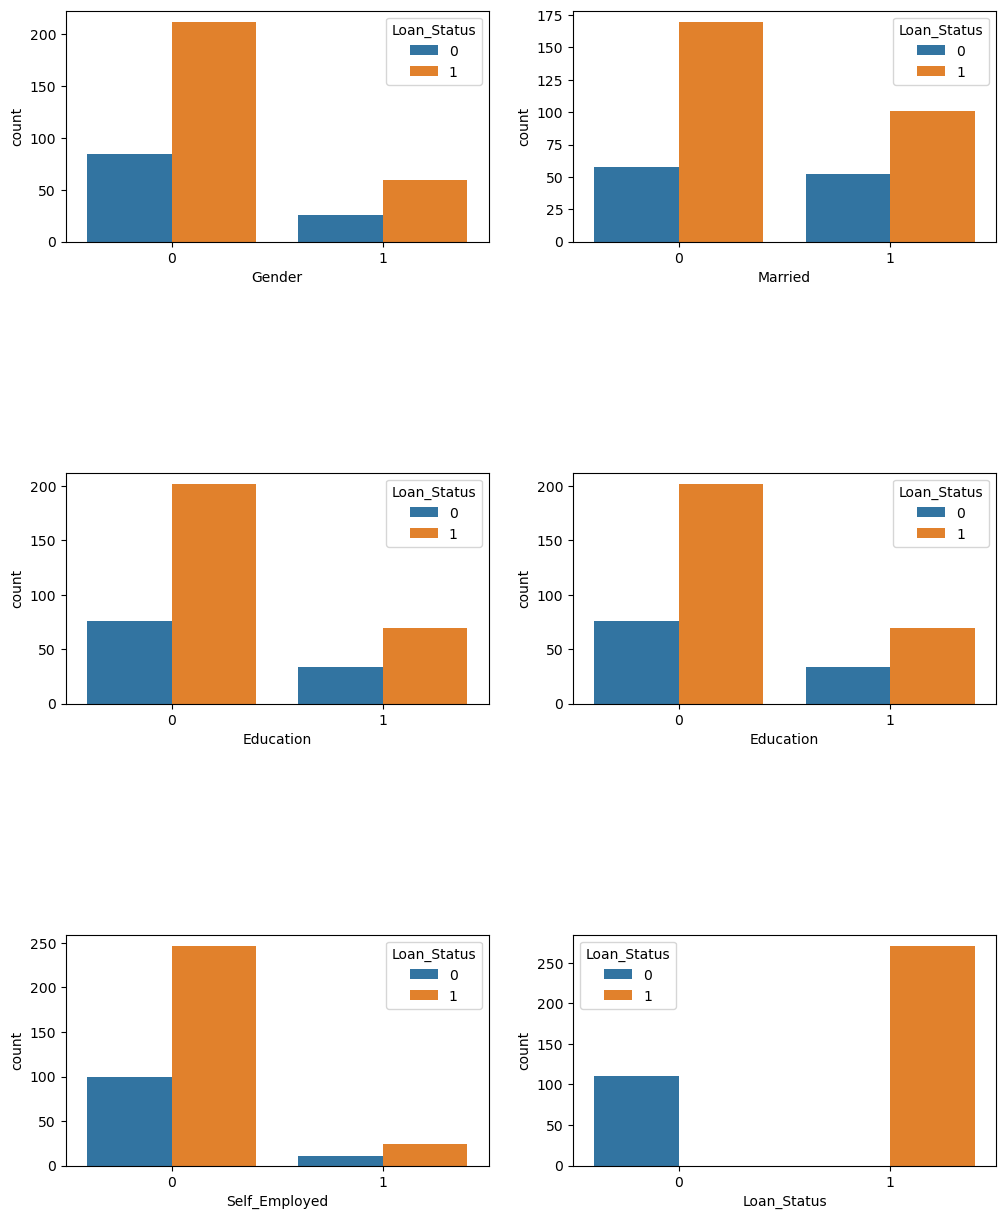

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))
for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row, col])
plt.subplots_adjust(hspace=1)

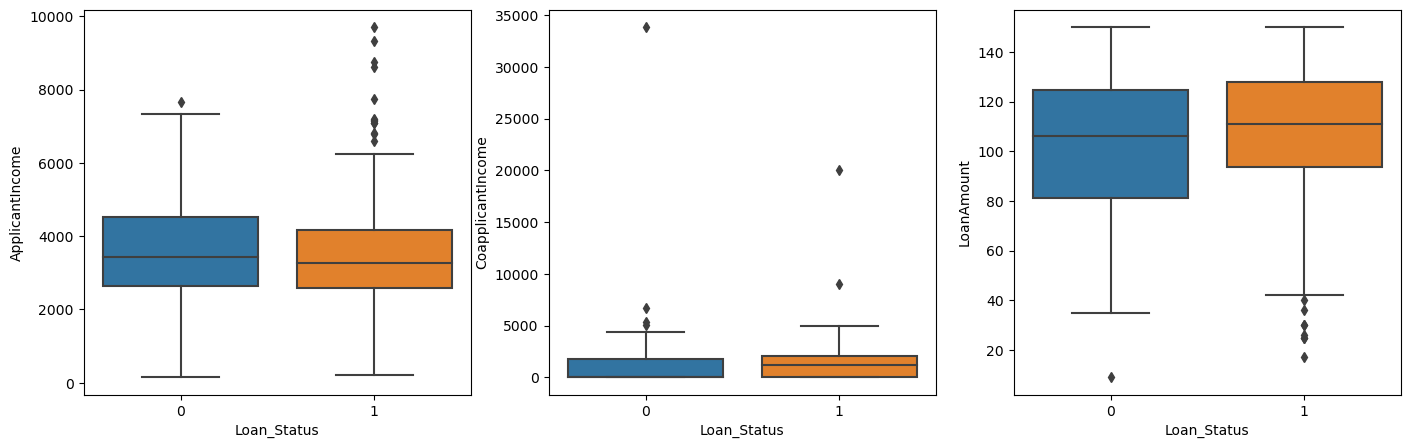

In [48]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(1, 3, figsize=(17,5))
for idx, cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=df, x='Loan_Status', ax=axes[idx])
plt.subplots_adjust(hspace=1)

In [49]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [50]:
X.shape, y.shape

((381, 11), (381,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [53]:
y_pred = nb_classifier.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182
